In [166]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [167]:
exoplanets = pd.read_excel("/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/3 semestre/Analisis de Metodos Matematicos para la Fisica/Exoplanets2.xlsx")
exoplanets.head()

,n_planet,pl_name,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
0,30,KELT-9 b,2,1,1.481124,0.03462,21.196,915.35040,0.0000,0,10170.0,2.36,2.52,4.09,7.550,7.482
1,35,WASP-178 b,1,1,3.344829,0.05580,20.288,527.59780,0.0000,0,9360.0,1.67,2.07,4.31,9.946,9.703
2,38,KELT-20 b,1,1,3.474119,0.05700,20.512,5403.11000,0.0000,0,8980.0,1.60,1.89,4.31,7.590,7.415
3,56,MASCARA-4 b,2,1,2.824060,0.04700,17.150,985.27300,0.0000,0,7800.0,1.92,1.75,4.10,8.191,7.750
4,76,TOI-1431 b,1,1,2.650237,0.04600,16.701,991.62463,0.0022,0,7690.0,1.92,1.90,4.15,8.030,7.439


In [168]:
exoplanets.describe()

,n_planet,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,15979.201354,1.195431,1.675973,23.786868,0.111289,9.020524,365.877780,0.088729,0.102369,5421.643511,1.127893,0.989653,4.390406,11.798747,9.720131
std,15238.425738,0.439243,1.230056,131.101454,0.230093,5.790948,778.671425,0.140899,0.303261,904.353846,0.534411,0.304098,0.286323,2.115148,1.906986
min,30.000000,1.000000,1.000000,0.179715,0.005800,0.510000,0.070000,0.000000,0.000000,2960.000000,0.010000,0.140000,2.950000,5.569110,3.261000
25%,2166.500000,1.000000,1.000000,2.980421,0.039135,2.858000,11.825000,0.000000,0.000000,5065.750000,0.800000,0.822500,4.230000,10.324000,8.426750
50%,5368.000000,1.000000,1.000000,4.611488,0.055255,10.180000,122.840990,0.030000,0.000000,5609.500000,1.020000,0.990000,4.400000,11.828000,9.788000
75%,34058.750000,1.000000,2.000000,11.499270,0.096975,13.502750,365.499503,0.119000,0.000000,6000.000000,1.400000,1.190000,4.550000,13.139500,11.001750
max,36442.000000,4.000000,6.000000,3650.000000,4.500000,25.000000,8899.000000,0.941200,1.000000,10170.000000,6.300000,2.520000,7.920000,17.350000,15.548000


In [169]:
columnas_eliminar = ["n_planet", "pl_name"]
data = exoplanets.drop(columns=columnas_eliminar)

data.head()

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
0,2,1,1.481124,0.03462,21.196,915.35040,0.0000,0,10170.0,2.36,2.52,4.09,7.550,7.482
1,1,1,3.344829,0.05580,20.288,527.59780,0.0000,0,9360.0,1.67,2.07,4.31,9.946,9.703
2,1,1,3.474119,0.05700,20.512,5403.11000,0.0000,0,8980.0,1.60,1.89,4.31,7.590,7.415
3,2,1,2.824060,0.04700,17.150,985.27300,0.0000,0,7800.0,1.92,1.75,4.10,8.191,7.750
4,1,1,2.650237,0.04600,16.701,991.62463,0.0022,0,7690.0,1.92,1.90,4.15,8.030,7.439


In [170]:
data_cor = data.corr()
data_cor.head()

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
sy_snum,1.000000,-0.028444,0.039601,0.075926,0.089281,0.069004,-0.058720,-0.048611,0.063069,0.016942,0.059272,0.030541,-0.057542,-0.041502
sy_pnum,-0.028444,1.000000,0.013519,0.058416,-0.512740,-0.185080,-0.069899,0.354576,-0.139587,-0.211206,-0.216096,0.160685,-0.172204,-0.215487
pl_orbper,0.039601,0.013519,1.000000,0.914380,-0.005016,0.162974,0.107014,0.047873,0.005626,0.079023,0.002052,-0.089277,0.035808,0.053043
pl_orbsmax,0.075926,0.058416,0.914380,1.000000,-0.045870,0.173020,0.195363,0.136894,0.061722,0.092720,0.045083,-0.110082,0.016782,0.065087
pl_rade,0.089281,-0.512740,-0.005016,-0.045870,1.000000,0.327612,0.022525,-0.112891,0.517589,0.517372,0.597357,-0.458328,0.186827,0.416678


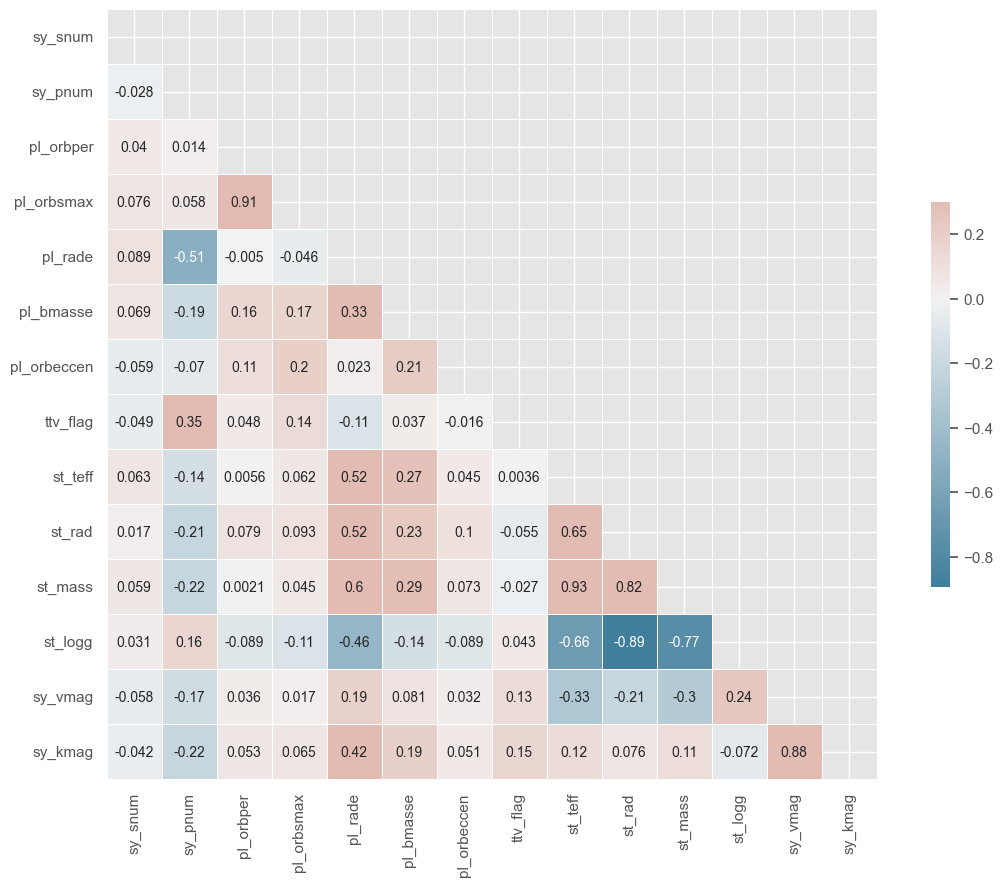

In [171]:
mask = np.triu(np.ones_like(data_cor))
plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data_cor, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, annot=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.show()

In [172]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [173]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(data_scaled)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [174]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data.columns,
    index   = [f'PC{i+1}' for i in range(14)]
)

,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_orbeccen,ttv_flag,st_teff,st_rad,st_mass,st_logg,sy_vmag,sy_kmag
PC1,0.034357,-0.182749,0.056379,0.067397,0.358774,0.197771,0.070276,-0.044760,0.424304,0.437488,0.465124,-0.420379,-0.089037,0.102521
PC2,-0.014014,-0.205496,0.226665,0.218636,0.219377,0.213030,0.117180,0.101738,-0.124663,-0.090845,-0.116172,0.112804,0.602829,0.572180
PC3,0.049389,0.245105,0.598765,0.626889,-0.219919,0.089815,0.165087,0.165628,0.004438,0.027238,-0.016649,-0.047098,-0.193006,-0.185339
PC4,-0.225772,0.522842,-0.167779,-0.099160,-0.102420,-0.096444,-0.137128,0.688832,0.149344,0.081958,0.113614,-0.122590,0.125807,0.227622
PC5,0.733564,0.052557,0.087151,0.065509,0.119272,-0.080012,-0.633290,0.088289,0.071878,-0.050049,0.033828,0.074984,0.020080,0.053987
PC6,0.459228,0.126082,-0.250292,-0.149614,-0.015321,0.575486,0.480737,0.222214,0.062871,-0.122133,0.028286,0.205577,-0.087076,-0.082240
PC7,-0.423417,-0.114822,0.076967,-0.010016,0.090722,0.635428,-0.515417,0.084473,0.058370,-0.152245,0.008471,0.210691,-0.152102,-0.150120
PC8,0.000256,-0.610229,0.004063,0.048146,0.212502,-0.277010,0.103924,0.630039,-0.053028,-0.079800,-0.024202,0.093338,-0.168409,-0.220920
PC9,-0.102724,0.082562,0.035516,0.096502,0.119833,-0.260569,0.117584,-0.138873,0.582963,-0.477744,0.252983,0.427124,-0.116600,0.169037
PC10,-0.060814,0.422710,0.106479,-0.052678,0.815433,-0.078264,0.087267,-0.032120,-0.246356,-0.005884,-0.126043,0.063424,-0.057321,-0.199703


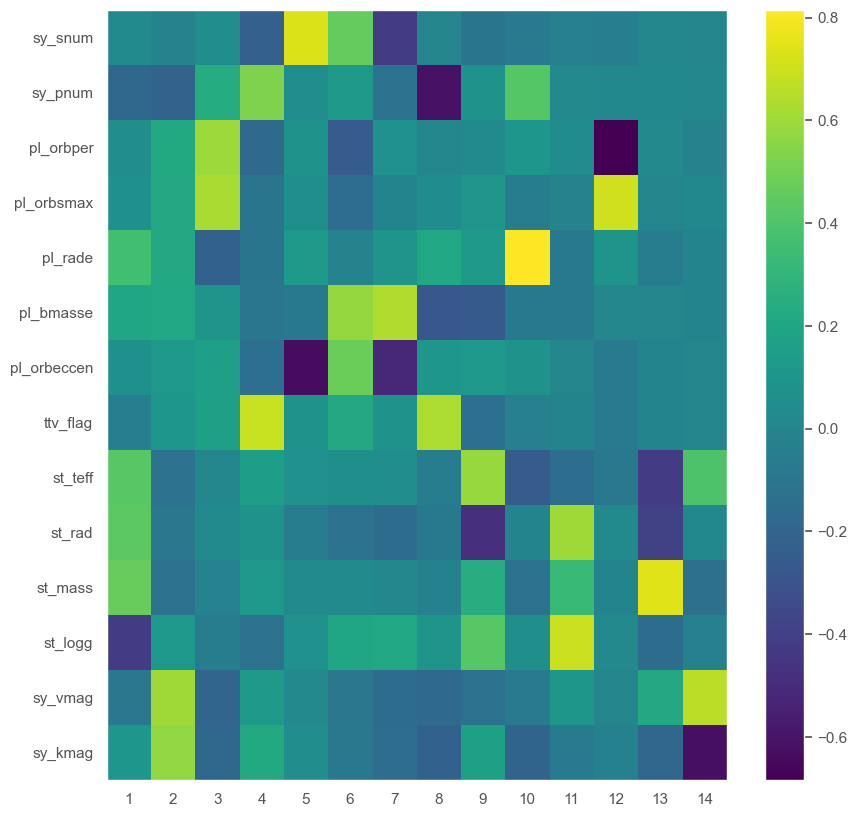

In [175]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.29189819 0.16009241 0.14412895 0.09457599 0.07625212 0.07029763
 0.05343205 0.03837376 0.03293679 0.02157123 0.00791862 0.00499954
 0.0025012  0.00102151]


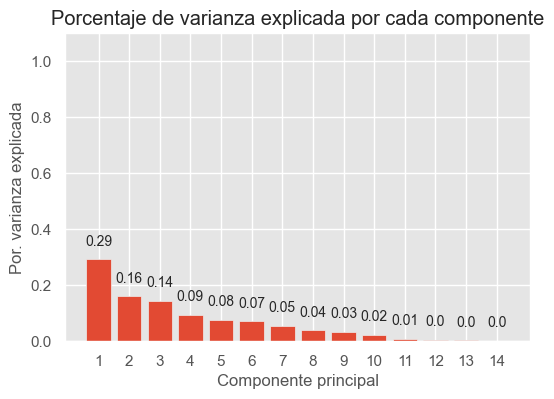

In [176]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29189819 0.4519906  0.59611955 0.69069554 0.76694766 0.83724529
 0.89067734 0.92905111 0.9619879  0.98355913 0.99147775 0.9964773
 0.99897849 1.        ]


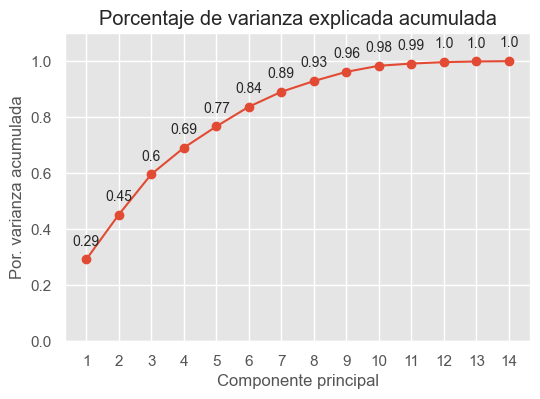

In [177]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(data.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [198]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones_ = pca_pipe.transform(X=data_scaled)
proyecciones = pd.DataFrame(
    proyecciones_,
    columns = [f"PC{i+1}" for i in range (14)],
    index   = data.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,7.075794,-2.971410,-0.257025,0.084795,2.092218,1.107543,0.471923,0.207802,2.590503,-0.387704,1.121665,-0.335784,0.435077,0.866282
1,4.911288,-1.219090,-0.798906,0.557285,0.543330,-0.216957,1.052167,0.126288,3.058228,-0.175403,0.686557,-0.170358,0.139109,0.701036
2,5.629453,-1.100270,0.201007,-0.605688,-0.083687,3.554821,5.376087,-1.100502,1.025981,-0.151708,-0.049313,-0.049132,-0.097858,0.559600
3,4.168720,-2.128422,-0.133473,-0.540330,1.789465,0.992666,0.356896,0.224224,0.716506,-0.039663,0.272889,-0.159444,0.060706,0.257416
4,4.159487,-2.272911,-0.201160,-0.050683,0.109205,0.023373,1.381274,0.265989,1.050241,0.052214,0.647739,-0.059038,0.463449,0.199998


In [195]:
proyecciones_reducido = pd.DataFrame(
    proyecciones_[:,:9],
    columns = [f"PC{i+1}" for i in range (9)],
    index = data.index,
)

proyecciones_reducido.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,7.075794,-2.971410,-0.257025,0.084795,2.092218,1.107543,0.471923,0.207802,2.590503
1,4.911288,-1.219090,-0.798906,0.557285,0.543330,-0.216957,1.052167,0.126288,3.058228
2,5.629453,-1.100270,0.201007,-0.605688,-0.083687,3.554821,5.376087,-1.100502,1.025981
3,4.168720,-2.128422,-0.133473,-0.540330,1.789465,0.992666,0.356896,0.224224,0.716506
4,4.159487,-2.272911,-0.201160,-0.050683,0.109205,0.023373,1.381274,0.265989,1.050241


In [179]:
# Proyección de las observaciones de entrenamiento, reducidas a las CP a utilizar
# ==============================================================================
proyecciones_reducido = pca_pipe.transform(X=data_scaled)
proyecciones_reducido = pd.DataFrame(
    proyecciones_reducido[:, :9],
    columns = [f"PC{i+1}" for i in range (9)],
    index   = data.index
)
proyecciones_reducido.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,7.075794,-2.971410,-0.257025,0.084795,2.092218,1.107543,0.471923,0.207802,2.590503
1,4.911288,-1.219090,-0.798906,0.557285,0.543330,-0.216957,1.052167,0.126288,3.058228
2,5.629453,-1.100270,0.201007,-0.605688,-0.083687,3.554821,5.376087,-1.100502,1.025981
3,4.168720,-2.128422,-0.133473,-0.540330,1.789465,0.992666,0.356896,0.224224,0.716506
4,4.159487,-2.272911,-0.201160,-0.050683,0.109205,0.023373,1.381274,0.265989,1.050241


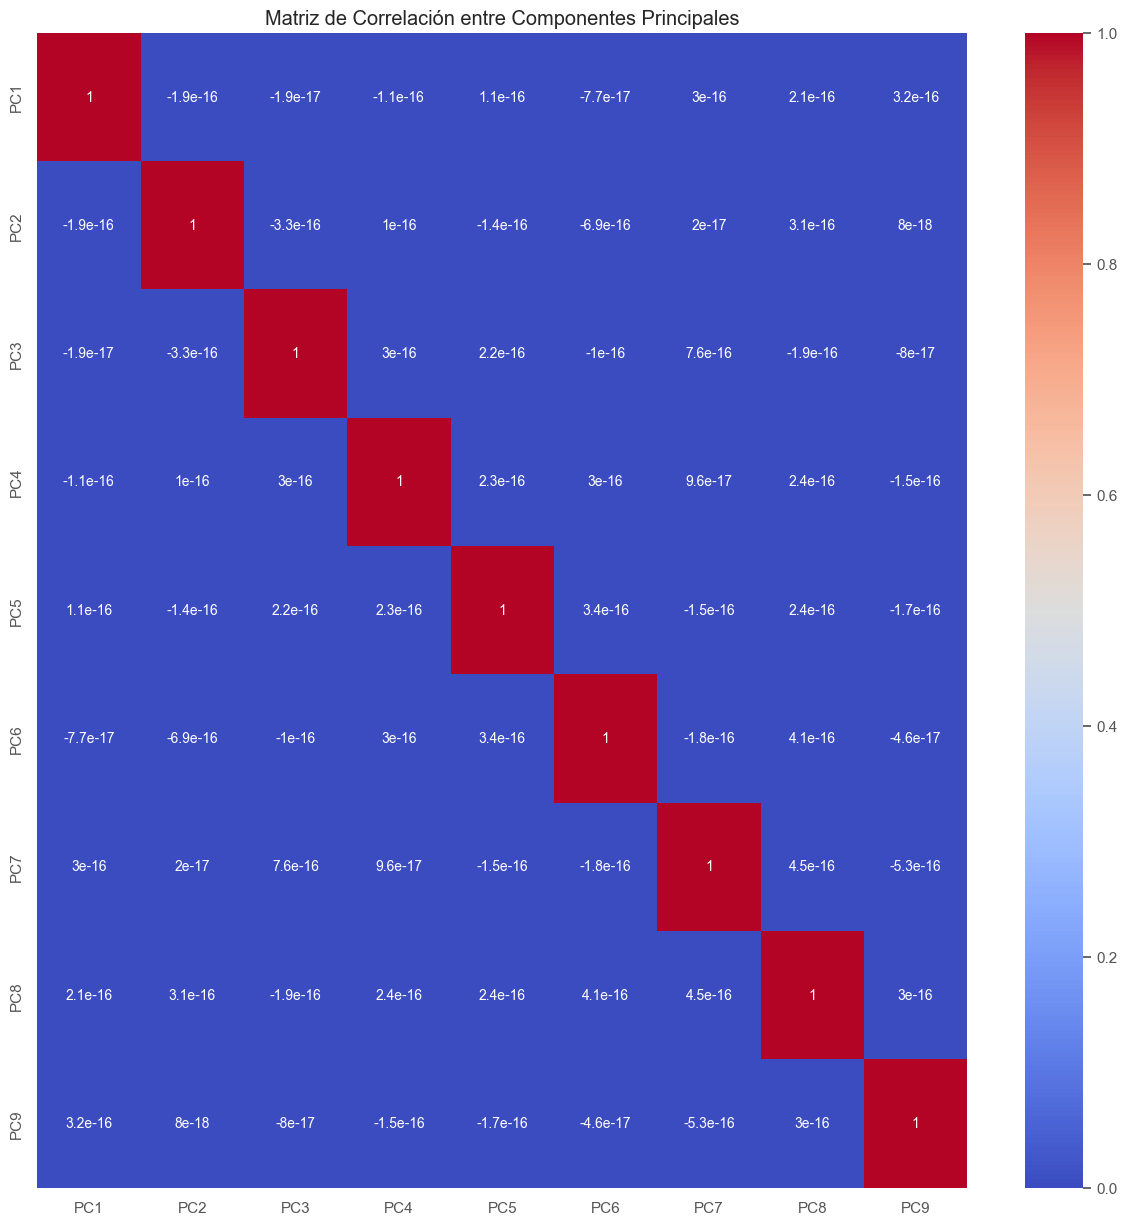

In [199]:
plt.figure(figsize=(15,15))
sns.heatmap(proyecciones_reducido.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Componentes Principales')
plt.show()